In [47]:
import os
from scipy.odr import *
DIR = os.path.abspath('')
DATA = os.path.join(DIR, '../Data/Aufg41.csv')
DATA2 = os.path.join(DIR, '../Data/Aufg42.csv')
PLOTS = os.path.join(DIR, '../Plots')

sns.set_style('whitegrid')

data = pd.read_csv(DATA, comment='#', engine='python')
data['d[m]'] = data['Laenge'].replace(['l', 's'], [198e-3, 58e-3])
data['c[g/cm^3]'] = data['c[g/l]'] / 1000
data['delta'] = data['Winkel[deg]'] - 14
data['Hilfsgröße [deg/(g/cm^3 * m)]'] = data['d[m]']*data['c[g/cm^3]']
data

,Laenge,c[g/l],Winkel[deg],d[m],c[g/cm^3],delta,Hilfsgröße [deg/(g/cm^3 * m)]
0,l,0,14,0.198,0.000,0,0.00000
1,l,300,36,0.198,0.300,22,0.05940
2,s,300,23,0.058,0.300,9,0.01740
3,l,200,35,0.198,0.200,21,0.03960
4,s,200,20,0.058,0.200,6,0.01160
5,l,150,27,0.198,0.150,13,0.02970
6,s,150,19,0.058,0.150,5,0.00870
7,l,120,26,0.198,0.120,12,0.02376
8,s,120,16,0.058,0.120,2,0.00696
9,l,100,24,0.198,0.100,10,0.01980


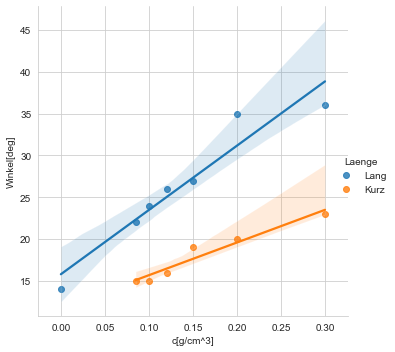

In [41]:
g = sns.lmplot(x="c[g/cm^3]", y="Winkel[deg]", hue="Laenge", data=data)
new_labels = ['Lang', 'Kurz']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.savefig(os.path.join(PLOTS, "aufg41_unnötig.png"), dpi=200)

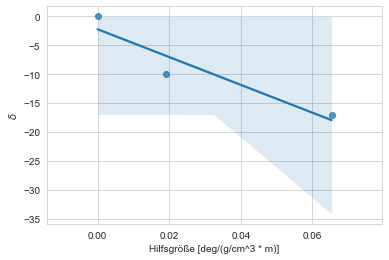

In [58]:
g = sns.regplot(x="Hilfsgröße [deg/(g/cm^3 * m)]", y="delta", data=data)
plt.ylabel("Delta[deg]")
plt.savefig(os.path.join(PLOTS, "aufg41_regression.png"), dpi=200)

In [50]:
def lin(B, x):
    return B*x

linear = Model(lin)

delta_err = 0.5  # deg
c_err = 0.01  # g/cm^3
cd_err = c_err * data['d[m]']

data_ = RealData(data['d[m]']*data['c[g/cm^3]'], data['delta'], cd_err, delta_err)

odr = ODR(data_, linear, beta0=[1])
output = odr.run()

print("[delta] = {:.3f} +/- {:.3f} deg/(g/cm^3 * m)".format(*output.beta, *output.sd_beta))

[delta] = 452.136 +/- 24.345 deg/(g/cm^3 * m)


In [54]:
data = pd.read_csv(DATA2, comment='#', engine='python')
data['d[m]'] = data['Laenge'].replace(['l', 's'], [198e-3, 58e-3])
data['delta'] = data['Winkel[deg]'] - 14
data['Hilfsgröße [deg/(g/cm^3 * m)]'] = data['d[m]']*data['c[g/cm3]']
data

,Laenge,c[g/cm3],Winkel[deg],d[m],delta,Hilfsgröße [deg/(g/cm^3 * m)]
0,l,0.00,14,0.198,0,0.00000
1,l,0.33,-3,0.198,-17,0.06534
2,s,0.33,4,0.058,-10,0.01914


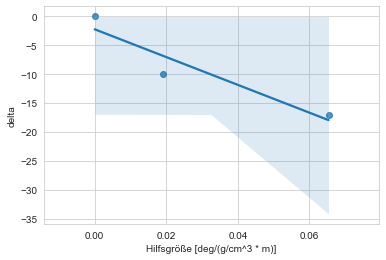

In [55]:
g = sns.regplot(x="Hilfsgröße [deg/(g/cm^3 * m)]", y="delta", data=data)
plt.savefig(os.path.join(PLOTS, "aufg42_regression.png"), dpi=200)

In [57]:
def lin(B, x):
    return B*x

linear = Model(lin)

delta_err = 0.5  # deg
c_err = 0.01  # g/cm^3
cd_err = c_err * data['d[m]']

data_ = RealData(data['Hilfsgröße [deg/(g/cm^3 * m)]'], data['delta'], cd_err, delta_err)

odr = ODR(data_, linear, beta0=[100])
output = odr.run()

print("[delta] = {:.3f} +/- {:.3f} deg/(g/cm^3 * m)".format(*output.beta, *output.sd_beta))

[delta] = -308.466 +/- 72.699 deg/(g/cm^3 * m)
